# Hypothesis Testing with Insurance Data (Core)

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance="insurance - insurance.csv"
df = pd.read_csv(insurance)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1. Do smokers have higher insurance charges than non-smokers?

### State the null and alternative hypotheses.
 -(Null Hypothesis): There is no difference between Smokers and Non-Smokers insurance Charges.
        
 -(Alternative Hypothesis): There is a significant difference between Smokers and Non-Smokers insurance Charges.

In [5]:
## create a column that easily separates our groups
df['no_smoker']= df['smoker'].str.contains('no', case=False)
df

,age,sex,bmi,children,smoker,region,charges,no_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True
1334,18,female,31.920,0,no,northeast,2205.98080,True
1335,18,female,36.850,0,no,southeast,1629.83350,True
1336,21,female,25.800,0,no,southwest,2007.94500,True


In [7]:
## save list of columns needed for each group
needed_cols = ['no_smoker','smoker','charges']

df[needed_cols]

,no_smoker,smoker,charges
0,False,yes,16884.92400
1,True,no,1725.55230
2,True,no,4449.46200
3,True,no,21984.47061
4,True,no,3866.85520
...,...,...,...
1333,True,no,10600.54830
1334,True,no,2205.98080
1335,True,no,1629.83350
1336,True,no,2007.94500


In [8]:
## save discount in separate variable
no_smoker_df = df.loc[df['no_smoker']==True, needed_cols]
no_smoker_df

,no_smoker,smoker,charges
1,True,no,1725.55230
2,True,no,4449.46200
3,True,no,21984.47061
4,True,no,3866.85520
5,True,no,3756.62160
...,...,...,...
1332,True,no,11411.68500
1333,True,no,10600.54830
1334,True,no,2205.98080
1335,True,no,1629.83350


In [9]:
smoker_df = df.loc[df['no_smoker']==False, needed_cols]
smoker_df

,no_smoker,smoker,charges
0,False,yes,16884.92400
11,False,yes,27808.72510
14,False,yes,39611.75770
19,False,yes,36837.46700
23,False,yes,37701.87680
...,...,...,...
1313,False,yes,36397.57600
1314,False,yes,18765.87545
1321,False,yes,28101.33305
1323,False,yes,43896.37630


In [10]:
## Separate the column of interest based on the groups
no_smoker_df = df.loc[ df['no_smoker']==False, ['charges','no_smoker']]
smoker_df = df.loc[ df['no_smoker']==True, ['charges','no_smoker']]
print(f"There are {len(no_smoker_df)} have no smokers." )
print(f"There are {len(smoker_df)} have smokers." )

There are 274 have no smokers.
There are 1064 have smokers.


In [12]:
# Build groups
no_smoker_group = no_smoker_df['charges']
smoker_group = smoker_df['charges']
display(no_smoker_group.head(), smoker_group.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

### This is numeric 2 Sample question.

- Check No Significant Outliers
- Check Normality
- Check Equal Variance

### Check for Outliers

In [13]:
## Checking for abs vlaue of z-scores that are > 3
is_outlier_no_smoker = np.abs(stats.zscore(no_smoker_group)) > 3
print(f"There are {is_outlier_no_smoker.sum()} outliers in the No smoker group out of {len(no_smoker_group)})")

There are 0 outliers in the No smoker group out of 274)


In [14]:
## Checking for abs vlaue of z-scores that are > 3
is_outlier_smoker = np.abs(stats.zscore(smoker_group)) > 3
print(f"There are {is_outlier_smoker.sum()} outliers in the smoker group of out of {len(smoker_group)}.")

There are 24 outliers in the smoker group of out of 1064.


In [15]:
## removing outliers from smoker_group
smoker_group = smoker_group.loc[~is_outlier_smoker]
smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

### Check for Normality

- according to the Learning Platform since both groups a . 15 it is safe to ignore the assumption of normalcy.

### Checking for Equal Variance

In [16]:
result = stats.levene(smoker_group, no_smoker_group)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


#### -According to the documentation for stats.levene, the null hypothesis for the test is that both groups have equal variance. Since our p-value is less than .05 we reject that null hypothesis and conclude that our groups do NOT have equal variance.

#### -Since we did NOT meet the assumption of equal variance, we will run our stats.ttest_ind using equal_var=False. This will run a Welch's T-Test, which is designed to account for unequal variance.

### Statistical Test

In [17]:
result = stats.ttest_ind(smoker_group, no_smoker_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)


True

In [19]:
## concatenate the two dataframes for visualziation.
plot_df = pd.concat([smoker_df.loc[~is_outlier_smoker], 
                     no_smoker_df.loc[~is_outlier_no_smoker]], axis=0)
plot_df

,charges,no_smoker
1,1725.55230,True
2,4449.46200,True
3,21984.47061,True
4,3866.85520,True
5,3756.62160,True
...,...,...
1313,36397.57600,False
1314,18765.87545,False
1321,28101.33305,False
1323,43896.37630,False


<AxesSubplot: xlabel='no_smoker', ylabel='charges'>

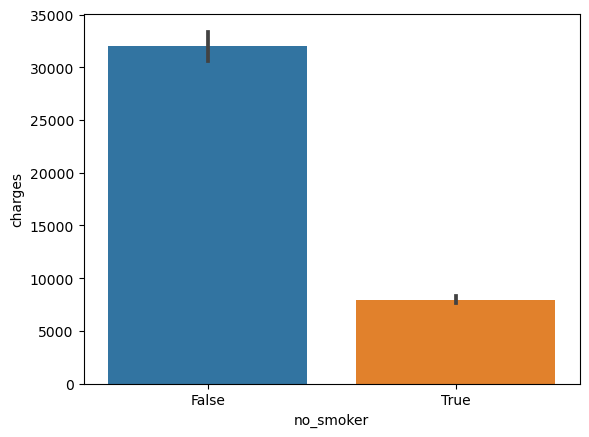

In [20]:
sns.barplot(data=plot_df, x='no_smoker',y='charges')

### Answer for Q1 question

- The testing has verifies that I must reject the null hypothesis and support the alternative hypothesis.

- There is a clear difference between the two groups.

## Q2. Are men more likely to smoke than women?

### State the null and alternative hypotheses.
 -(Null Hypothesis): There is no difference between the amount of smokers that are men or women.
        
 -(Alternative Hypothesis): There is a significant difference between the amount of smokers that are men or women.

In [24]:
## Create a column that defines the 2 groups, has female or not
df['has_female'] = df['sex'].str.contains('female', case=False)
df

,age,sex,bmi,children,smoker,region,charges,no_smoker,has_female
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False
1334,18,female,31.920,0,no,northeast,2205.98080,True,True
1335,18,female,36.850,0,no,southeast,1629.83350,True,True
1336,21,female,25.800,0,no,southwest,2007.94500,True,True


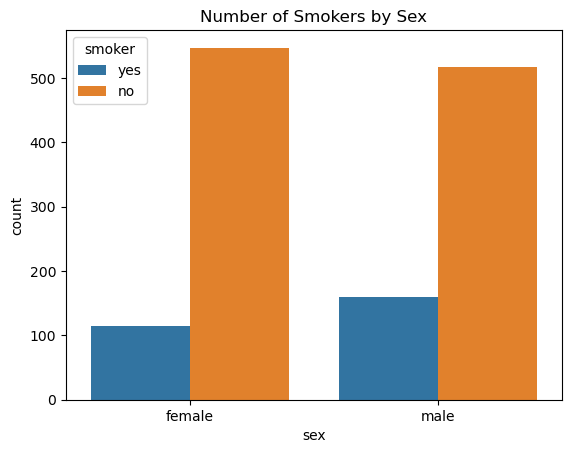

In [36]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [38]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


Checking Assumptions of Chi-square
According the the work flow, the Chi_square test has the following assumptions:

-There are two categorical variables (ordinal or nominal)
 - I believe this is an ordinal question because we are looking for the smokers difference between male and female clients.

-The outcomes are independent

In [39]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [40]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

### Answer for Q2 

- The p value is < 0.05 this mean that will be rejecting my null hypothesis and support the alternative hypothesis for this question.

- You can see a significant difference between both groups.

## Q3. Do different regions have different charges, on average?

### State the null and alternative hypotheses.
 -(Null Hypothesis): There is no difference in charges between the regions.
        
 -(Alternative Hypothesis): There is a significant difference in charges between the regions.

In [41]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [43]:
## save the 4 new columns into the dataframe and delte the region
df[['southwest','southeast','northwest','northest']] = df['region'].str.split(',',expand=True)
df = df.drop(columns=['region'])
df.head(2)

ValueError: Columns must be same length as key

# I wasn't sure what do do here. Will ask for help on monday when every one is done with testing.

In [ ]:
## create a column that easily separates our groups
df['regions']= df['smoker'].str.contains('no', case=False)
df

### This is numeric more than 2 Sample question.
#### The One Way ANOVA test would be the best addiquet for this question

-No significant outliers

-Equal variance

-Normality